<a href="https://colab.research.google.com/github/DamodaraBarbosa/eleicoes_ceara_2022/blob/main/08_1%C2%BA_turno_presidente_eleicoes_ceara_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalação das bibliotecas `geopandas`, `geobr` e `descartes`

In [16]:
!pip install geopandas geobr descartes

Importando as bibliotecas

In [17]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geobr import read_municipality
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [18]:
# Para ignorar qualquer aviso:

import warnings

warnings.filterwarnings("ignore")

# 1. Carregamento dos dados no *dataframe*

In [19]:
# Os dados da eleição presidencial são carregados:

votos_presidente = pd.read_csv(
    '/content/drive/MyDrive/Datasets/votacao_secao_2022_BR.csv',
    encoding= 'latin-1', sep= ';'
)

# E visualizados:

votos_presidente.head(2)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NM_MUNICIPIO,NR_ZONA,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO
0,04/10/2022,21:02:14,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,EUNÁPOLIS,188,319,1,PRESIDENTE,15,SIMONE NASSAR TEBET,6,1694,280001607833
1,04/10/2022,21:02:14,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,CHAPADINHA,42,169,1,PRESIDENTE,15,SIMONE NASSAR TEBET,1,1864,280001607833


In [20]:
# Selecionam-se apenas os dados referentes ao estado do Ceará e ao 1º turno da eleição:

presidente = votos_presidente.query('SG_UF == "CE" and NR_TURNO == 1')

presidente.head(2)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NM_MUNICIPIO,NR_ZONA,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO
30,04/10/2022,21:02:14,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,FORTALEZA,3,503,1,PRESIDENTE,15,SIMONE NASSAR TEBET,7,2259,280001607833
65,04/10/2022,21:02:14,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,PARAMBU,19,395,1,PRESIDENTE,15,SIMONE NASSAR TEBET,2,1716,280001607833


# 2. Informações do *dataframe*

## 2.1 Dimensões do *dataframe*

In [21]:
f'O dataframe possui {presidente.shape[0]} linhas em {presidente.shape[1]} colunas.'

'O dataframe possui 154686 linhas em 24 colunas.'

## 2.2 Infos do *dataframe*

In [22]:
presidente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154686 entries, 30 to 3529834
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   DT_GERACAO        154686 non-null  object
 1   HH_GERACAO        154686 non-null  object
 2   ANO_ELEICAO       154686 non-null  int64 
 3   CD_TIPO_ELEICAO   154686 non-null  int64 
 4   NM_TIPO_ELEICAO   154686 non-null  object
 5   NR_TURNO          154686 non-null  int64 
 6   CD_ELEICAO        154686 non-null  int64 
 7   DS_ELEICAO        154686 non-null  object
 8   DT_ELEICAO        154686 non-null  object
 9   TP_ABRANGENCIA    154686 non-null  object
 10  SG_UF             154686 non-null  object
 11  SG_UE             154686 non-null  object
 12  NM_UE             154686 non-null  object
 13  CD_MUNICIPIO      154686 non-null  int64 
 14  NM_MUNICIPIO      154686 non-null  object
 15  NR_ZONA           154686 non-null  int64 
 16  NR_SECAO          154686 non-null  i

## 2.3 Dados faltantes

É importante verificar a presença de dados faltantes no conjunto de dados, portanto:

In [23]:
presidente.isnull().sum()

DT_GERACAO          0
HH_GERACAO          0
ANO_ELEICAO         0
CD_TIPO_ELEICAO     0
NM_TIPO_ELEICAO     0
NR_TURNO            0
CD_ELEICAO          0
DS_ELEICAO          0
DT_ELEICAO          0
TP_ABRANGENCIA      0
SG_UF               0
SG_UE               0
NM_UE               0
CD_MUNICIPIO        0
NM_MUNICIPIO        0
NR_ZONA             0
NR_SECAO            0
CD_CARGO            0
DS_CARGO            0
NR_VOTAVEL          0
NM_VOTAVEL          0
QT_VOTOS            0
NR_LOCAL_VOTACAO    0
SQ_CANDIDATO        0
dtype: int64

> Não há dados faltantes no conjunto de dados.

## 2.4 Dados duplicados

In [24]:
presidente.loc[presidente.duplicated()]

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NM_MUNICIPIO,NR_ZONA,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO


> Também não há dados duplicados no conjunto de dados.

# 3. Tratamento dos dados

## 3.1 Seleção das colunas de interesse

Nem toda coluna do *dataframe* é de interesse na análise, na base de dados, por exemplo, há colunas com valores que se repetem em todas as linhas. Além disso, sabe-se que é uma análise do 1º turno da eleição presidencial, dos municípios cearenses, ou seja, há que colunas que não são relevantes. As colunas selecionadas são:

In [25]:
presidente = presidente[['NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS']]
presidente.head(2)

,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
30,FORTALEZA,3,503,15,SIMONE NASSAR TEBET,7
65,PARAMBU,19,395,15,SIMONE NASSAR TEBET,2


## 3.2 Renomeação das colunas

Por questões estéticas e de boas práticas os nomes das colunas são colocadas em letras minúsculas.

In [26]:
# As colunas são renomeadas:

presidente = presidente.rename({'NM_MUNICIPIO': 'nm_municipio', 'NR_ZONA': 'nr_zona',
                                'NR_SECAO': 'nr_secao', 'NR_VOTAVEL': 'nr_votavel',
                                'NM_VOTAVEL': 'nm_votavel', 'QT_VOTOS': 'qt_votos'}, axis= 1)
presidente. head(2)

,nm_municipio,nr_zona,nr_secao,nr_votavel,nm_votavel,qt_votos
30,FORTALEZA,3,503,15,SIMONE NASSAR TEBET,7
65,PARAMBU,19,395,15,SIMONE NASSAR TEBET,2


## 3.3 Mudança do tipo de dado das colunas `nr_zona` e `nr_secao`

Apesar de serem valores numéricos, os dados das colunas `nr_zona` e `nr_secao` são categóricos já que representam zonas e seções eleitorais.

In [27]:
# Conversão dos dados das colunas para tipo string:

presidente['nr_zona'] = presidente['nr_zona'].astype(str)
presidente['nr_secao'] = presidente['nr_secao'].astype(str)

In [28]:
presidente.dtypes

nm_municipio    object
nr_zona         object
nr_secao        object
nr_votavel       int64
nm_votavel      object
qt_votos         int64
dtype: object

# 4. Análise da eleição para presidente no estado do Ceará

## 4.1 Candidatos

In [29]:
presidente['nm_votavel'].unique()

array(['SIMONE NASSAR TEBET', 'JAIR MESSIAS BOLSONARO',
       'KELMON LUIS DA SILVA SOUZA', 'VOTO NULO',
       'LUIZ INÁCIO LULA DA SILVA', 'CIRO FERREIRA GOMES', 'VOTO BRANCO',
       'VERA LUCIA PEREIRA DA SILVA SALGADO', 'SORAYA VIEIRA THRONICKE',
       'LUIZ FELIPE CHAVES D AVILA', 'SOFIA PADUA MANZANO',
       'LEONARDO PÉRICLES VIEIRA ROQUE', 'JOSE MARIA EYMAEL'],
      dtype=object)

## 4.2 Votos por candidato

In [30]:
# Os votos dos candidatos são somados e o dataframe é organizado em ordem decrescente de votos:

votos_por_candidato = presidente.groupby('nm_votavel')['qt_votos'].sum().to_frame().sort_values('qt_votos', ascending= False)

In [31]:
fig = px.bar(
    data_frame= votos_por_candidato,
    y= votos_por_candidato.index, text= 'qt_votos',
    x= 'qt_votos', color= votos_por_candidato.index,
    title= 'Votos nos candidatos à presidência no estado do Ceará'
)
fig.update_xaxes(range= [0, 4e6])
fig.update_traces(textfont_size= 12, textposition= 'outside')
fig.update_layout(title= dict(x= 0.5), yaxis_title= 'Candidatos', xaxis_title= 'Quantidade de votos', showlegend= False)
fig.show()

Os candidatos mais votados foram:

> * **1º:** Luis Inácio Lula da Silva (Candidato eleito) 🥇
> * **2º:** Jair Messias Bolsonaro 🥈
> * **3º:** Ciro Ferreira Gomes 🥉
>
> Os demais candidatos receberam menos votos que **VOTO BRANCO e NULO.**

## 4.3 Porcentagem dos votos totais e válidos

In [32]:
# Excetuam-se os votos brancos e nulos:

votos_validos = presidente.query('nm_votavel != ["VOTO NULO", "VOTO BRANCO"]')

# Calcula-se apenas os votos válidos:

total_votos_validos = votos_validos['qt_votos'].sum()
print(f'Votos válidos: {total_votos_validos}')

# Votos totais incluindo brancos e nulos:

total_votos = presidente['qt_votos'].sum()
print(f'Votos totais: {total_votos}')

Votos válidos: 5429264
Votos totais: 5628610


In [33]:
votos_validos['nm_votavel'].unique()

array(['SIMONE NASSAR TEBET', 'JAIR MESSIAS BOLSONARO',
       'KELMON LUIS DA SILVA SOUZA', 'LUIZ INÁCIO LULA DA SILVA',
       'CIRO FERREIRA GOMES', 'VERA LUCIA PEREIRA DA SILVA SALGADO',
       'SORAYA VIEIRA THRONICKE', 'LUIZ FELIPE CHAVES D AVILA',
       'SOFIA PADUA MANZANO', 'LEONARDO PÉRICLES VIEIRA ROQUE',
       'JOSE MARIA EYMAEL'], dtype=object)

> **VOTO BRANCO e VOTO NULO** foram removidos na variável `votos_validos`.

In [34]:
# Instancia-se um dataframe contendo a porcentagem de votos totais e votos válidos por candidato ao senado:

porcentagem_votos_presidente = pd.DataFrame(
    {'Votos totais': round((presidente.groupby('nm_votavel')['qt_votos'].sum()/total_votos) * 100, 2), # cálculo da porcentagem de votos totais.
     'Votos válidos': round((votos_validos.groupby('nm_votavel')['qt_votos'].sum()/total_votos_validos) * 100, 2)} # cálculo da porcentagem de votos válidos.
).sort_values(['Votos totais', 'Votos válidos'], ascending= [False, False]) # os dados são ordenados em ordem decrescente.

# Utiliza-se o método transpose para inverter index em colunas e vice-versa:

porcentagem_votos_presidente = porcentagem_votos_presidente.transpose()

porcentagem_votos_presidente

nm_votavel,LUIZ INÁCIO LULA DA SILVA,JAIR MESSIAS BOLSONARO,CIRO FERREIRA GOMES,VOTO NULO,VOTO BRANCO,SIMONE NASSAR TEBET,SORAYA VIEIRA THRONICKE,LUIZ FELIPE CHAVES D AVILA,KELMON LUIS DA SILVA SOUZA,SOFIA PADUA MANZANO,LEONARDO PÉRICLES VIEIRA ROQUE,JOSE MARIA EYMAEL,VERA LUCIA PEREIRA DA SILVA SALGADO
Votos totais,63.57,24.48,6.56,2.26,1.28,1.18,0.44,0.12,0.04,0.03,0.02,0.01,0.01
Votos válidos,65.91,25.38,6.80,NaN,NaN,1.22,0.45,0.13,0.04,0.03,0.02,0.01,0.01


In [35]:
fig = px.bar(
    data_frame= porcentagem_votos_presidente,
    y= porcentagem_votos_presidente.index,
    x= porcentagem_votos_presidente.columns,
    title= 'Porcentagem dos votos totais e válidos ao cargo de presidente no Ceará'
)
fig.update_layout(
    yaxis= dict(autorange= 'reversed'), xaxis_title= 'Porcentagem dos votos',
    yaxis_title= '', legend_title= 'Candidatos', title= dict(x= 0.5)
)
fig.show()

> * **Luis Inácio Lula da Silva** 🥇: 63,57% dos votos totais e 65,91% dos votos válidos.
> * **Jair Messias Bolsonaro** 🥈: 24,48% dos votos totais e 25,38% dos votos válidos.
> * **Ciro Ferreira Gomes** 🥉: 6,56% dos votos totais e 6,80% dos votos válidos.

## 4.4 Candidato vencedor por município cearense

In [36]:
# Os votos nos cadidatos à presidência são determinados:

votos_candidatos_por_municipio = presidente.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()

# Os dados são ordenados em ordem alfabética para os municípios e em ordem decrescente para os votos:

votos_candidatos_por_municipio = votos_candidatos_por_municipio.sort_values(['nm_municipio', 'qt_votos'], ascending= [True, False])

# Seleciona-se apenas o candidato que obteve mais votos em cada município:

vencedores_por_municipio = votos_candidatos_por_municipio.groupby('nm_municipio').head(1)
vencedores_por_municipio.head() # para visualizar o dataframe.

,nm_municipio,nm_votavel,qt_votos
5,ABAIARA,LUIZ INÁCIO LULA DA SILVA,4870
17,ACARAPE,LUIZ INÁCIO LULA DA SILVA,5996
29,ACARAÚ,LUIZ INÁCIO LULA DA SILVA,24551
42,ACOPIARA,LUIZ INÁCIO LULA DA SILVA,23642
54,AIUABA,LUIZ INÁCIO LULA DA SILVA,7010


In [37]:
# Dataframe com dados geoespaciais dos municípios cearenses:

ceara_gpd = read_municipality(code_muni= 23, year= 2020)

# Um pequeno tratamento é feito para que os nomes dos municípios estejam em caixa alta:

ceara_gpd['name_muni'] = ceara_gpd['name_muni'].str.upper()

ceara_gpd.head() # visualização do dataframe.

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,2300101.0,ABAIARA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ..."
1,2300150.0,ACARAPE,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ..."
2,2300200.0,ACARAÚ,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.30984 -2.80769, -40.26882 ..."
3,2300309.0,ACOPIARA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.15631 -5.95731, -39.15267 ..."
4,2300408.0,AIUABA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.11801 -6.34845, -40.11298 ..."


In [80]:
# É feita a união dos dados geoespaciais e os dados referentes aos candidatos vencedores em cada município:

vencedores_por_municipio_gpd = pd.merge(
    left= ceara_gpd[['name_muni', 'geometry']], right= vencedores_por_municipio,
    how= 'left', left_on= 'name_muni', right_on= 'nm_municipio'
)
vencedores_por_municipio_gpd = vencedores_por_municipio_gpd.drop('name_muni', axis= 1) # a coluna é eliminada visto que possui dados redundantes.

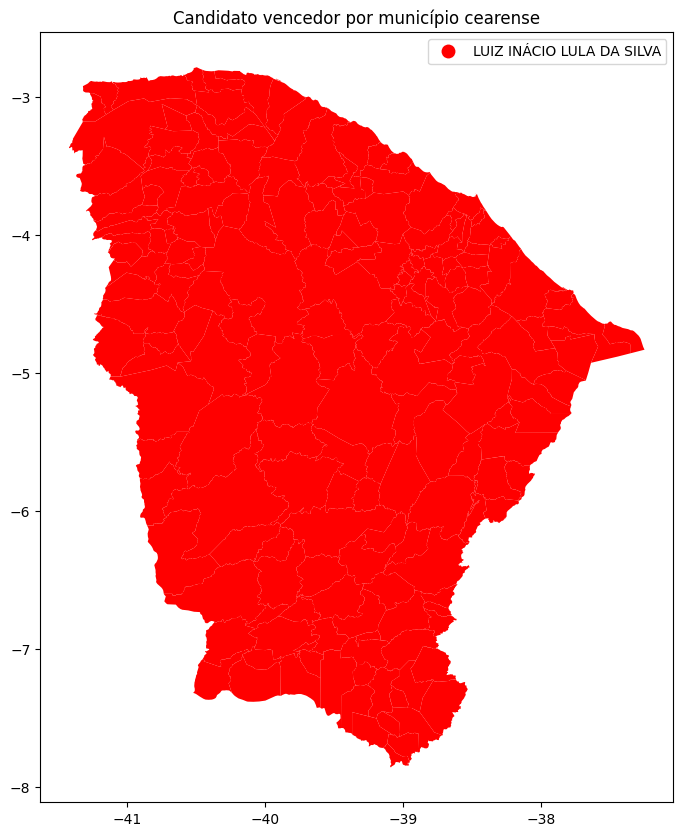

In [81]:
ax = vencedores_por_municipio_gpd.plot(
    'nm_votavel', cmap= 'autumn', legend= True,
    legend_kwds= {'loc': 'upper right'},
    figsize= (12, 10)
)
ax.set_title('Candidato vencedor por município cearense')
plt.show()

> O candidato eleito **Luiz Inácio Lula da Silva** foi o **mais votado em todos os municípios cearenses.**

## 4.5 Votos para presidência nos municípios da Região Metropolitana de Fortaleza

A Região Metropolitana de Fortaleza é constituída de 19 municípios sendo eles:

> Aquiraz, Cascavel, Caucaia, Chorozinho, Eusébio, Fortaleza, Guaiúba, Horizonte, Itaitinga, Maracanaú, Maranguape, Pacajus, Pacatuba, Pindoretama, São Gonçalo do Amarante, São Luís do Curu, Paraipaba, Paracuru e Trairi.

Fonte: https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_Fortaleza


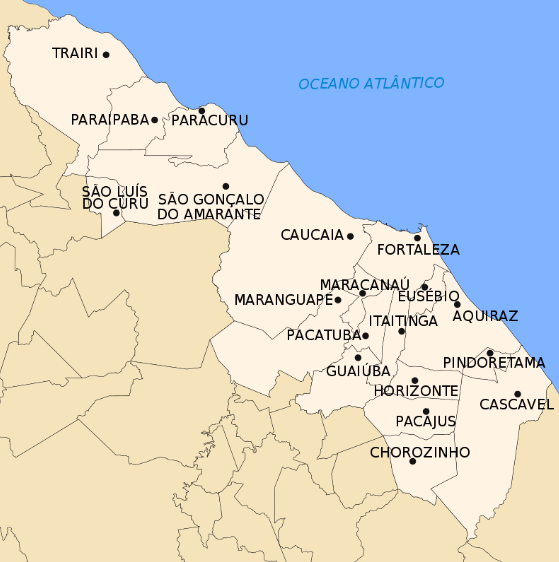

In [82]:
# Municípios da Região Metropolitana de Fortaleza:

regiao_metropolitana = [
    'AQUIRAZ', 'CASCAVEL', 'CAUCAIA', 'CHOROZINHO', 'EUSÉBIO',
    'FORTALEZA', 'GUAIÚBA', 'HORIZONTE', 'ITAITINGA', 'MARACANAÚ',
    'MARANGUAPE', 'PACAJUS', 'PACATUBA', 'PINDORETAMA',
    'SÃO GONÇALO DO AMARANTE', 'SÃO LUÍS DO CURU',
    'PARAIPABA', 'PARACURU', 'TRAIRI'
]

In [41]:
# Buscam-se no conjunto de dados à presidência apenas os municípios da Região Metropolitana de Fortaleza:

presidente_regiao_metropolitana = presidente.query('nm_municipio in @regiao_metropolitana')

# Agrupam-se os dados por município e candidato para determinar os votos:

vencedores_regiao_metropolitana = presidente_regiao_metropolitana.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()

# Os dados são ordenados em ordem alfabética e em ordem decrescente do número de votos:

vencedores_regiao_metropolitana = vencedores_regiao_metropolitana.sort_values(['nm_municipio', 'qt_votos'], ascending= [True, False])

vencedores_regiao_metropolitana.head()

,nm_municipio,nm_votavel,qt_votos
6,AQUIRAZ,LUIZ INÁCIO LULA DA SILVA,31902
1,AQUIRAZ,JAIR MESSIAS BOLSONARO,15296
0,AQUIRAZ,CIRO FERREIRA GOMES,2605
12,AQUIRAZ,VOTO NULO,1170
7,AQUIRAZ,SIMONE NASSAR TEBET,761


In [42]:
# Instancia-se um dicionário contendo o nº de votos totais ao cargo de senador por município da Região Metropolitana de Fortaleza:

votos_regiao_metropolitana = presidente.groupby('nm_municipio')['qt_votos'].sum()
votos_regiao_metropolitana = dict(votos_regiao_metropolitana)

In [43]:
# Cálculo da porcentagem de votos que cada candidato ao senado obteve em cada município da Região Metropolitana de Fortaleza:
# Para isso define-se uma função para o cálculo.

def porcentagem_votos(dataframe: pd.DataFrame, dictionary: dict):

  percentual_de_votos = list()

  for index, row in dataframe.iterrows(): # itera-se o dataframe para obter cada linha dele.
    porcentagem = round((row['qt_votos']/dictionary[row['nm_municipio']]) * 100, 2) # os votos são divididos pelo total de votos por município.
    percentual_de_votos.append(porcentagem) # o valor calculado é adicionado a lista.

  return percentual_de_votos

In [44]:
# A coluna com porcentagem de votos é adicionada ao dataframe:

porcentagens = porcentagem_votos(vencedores_regiao_metropolitana, votos_regiao_metropolitana) # porcentagens armazena as porcentagens de votos.
vencedores_regiao_metropolitana['porcentagem'] = porcentagens # criação da nova coluna no dataframe.

In [45]:
vencedores_regiao_metropolitana.head()

,nm_municipio,nm_votavel,qt_votos,porcentagem
6,AQUIRAZ,LUIZ INÁCIO LULA DA SILVA,31902,60.38
1,AQUIRAZ,JAIR MESSIAS BOLSONARO,15296,28.95
0,AQUIRAZ,CIRO FERREIRA GOMES,2605,4.93
12,AQUIRAZ,VOTO NULO,1170,2.21
7,AQUIRAZ,SIMONE NASSAR TEBET,761,1.44


In [46]:
fig = px.bar(
    data_frame= vencedores_regiao_metropolitana, y= 'nm_municipio', x= 'porcentagem', color= 'nm_votavel',
    title= 'Porcentagem dos votos nos candidados à presidência por município da Região Metropolitana de Fortaleza'
)
fig.update_layout(title= dict(x= 0.5), yaxis= dict(autorange= 'reversed'), yaxis_title= 'Municípios', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos')
fig.show()

> * As porcentagens de votos no candidato eleito **Luiz Inácio Lula da Silva ** variam entre cerca de 51% e 71%.
> * **Fortaleza e Eusébio** foram os municípios da Região Metropolitana de Fortaleza onde o ex-presidente **Jair Messias Bolsonaro teve melhor desempenho eleitoral.**

## 4.6 Comparação dos votos com os indicadores do IBGE

In [47]:
dados_ibge = pd.read_csv('/content/drive/MyDrive/Datasets/resumo_dados_ibge_ce.csv', encoding= 'latin-1')
dados_ibge.head()

,nome,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional
0,ABAIARA,180.833,11965,0.628,9158.04,3.19,1.76,66.17
1,ACARAPE,130.002,15140,0.606,10317.47,2.28,1.75,116.46
2,ACARAÚ,842.471,63556,0.601,13261.89,16.33,1.94,75.44
3,ACOPIARA,2254.279,54687,0.595,9432.25,5.46,0.24,24.26
4,AIUABA,2438.563,17584,0.569,8642.90,2.07,0.08,7.21


Visto que o candidato eleito Luiz Inácio Lula da Silva saiu como o mais votado em todos os municípios cearenses, não faz sentido comparar o mapa com os candidatos vencedores por município do Ceará. Portanto, as análises serão feitas comparando o mapa com o percentual de votos do candidato vencedor com os indicadores socioeconômicos do IBGE.

In [48]:
# Os votos no candidato eleito Lula da Silva por município cearense são obtidos:

votos_lula_por_municipio = presidente.query('nm_votavel == "LUIZ INÁCIO LULA DA SILVA"')\
                                     .groupby('nm_municipio')['qt_votos'].sum().reset_index()

votos_lula_por_municipio.head()

,nm_municipio,qt_votos
0,ABAIARA,4870
1,ACARAPE,5996
2,ACARAÚ,24551
3,ACOPIARA,23642
4,AIUABA,7010


In [49]:
# Somam-se os votos totais para cada município cearense:

votos_totais_por_municipio = presidente.groupby('nm_municipio')['qt_votos'].sum()
votos_totais_por_municipio = dict(votos_totais_por_municipio) # dicionário com o nº de votos por município, cada nome do município é uma chave.

In [50]:
# A porcentagem de votos no candidato eleito Lula da Silva por município é, então, calculada:

porcentagens_lula = porcentagem_votos(votos_lula_por_municipio, votos_totais_por_municipio)

# E os valores são inseridos no dataframe com a criação de uma nova coluna:

votos_lula_por_municipio['porcentagem_votos'] = porcentagens_lula
votos_lula_por_municipio.head()

,nm_municipio,qt_votos,porcentagem_votos
0,ABAIARA,4870,82.29
1,ACARAPE,5996,59.80
2,ACARAÚ,24551,66.85
3,ACOPIARA,23642,76.33
4,AIUABA,7010,80.92


In [51]:
# É feito o merge dos dados geoespaciais dos municípios com os indicadores do IBGE:

dados_ibge = pd.merge(
    left= ceara_gpd[['name_muni', 'geometry']], right= dados_ibge,
    how= 'left', left_on= 'name_muni', right_on= 'nome'
)
dados_ibge = dados_ibge.drop('nome', axis= 1) # a coluna nome é retirada, pois é redundante.

# É feito o merge dos dados geoespaciais dos municípios com os dados dos votos no candidato eleito Lula da Silva:

votos_lula_por_municipio = pd.merge(
    left= ceara_gpd[['name_muni', 'geometry']], right= votos_lula_por_municipio,
    how= 'left', left_on= 'name_muni', right_on= 'nm_municipio'
)
votos_lula_por_municipio = votos_lula_por_municipio.drop('nm_municipio', axis= 1) # a coluna nm_municipio é retirada, pois é redundante.

### 4.6.1 Densidade populacional

O conjunto de dados na coluna `densidade_populacional` é bastante discrepante. O município de Fortaleza concentra mais de 2,5 milhões de habitantes em território modesto, se comparado a outros municípios cearenses. Portanto, aplica-se transformação logarítimica para homogeneizar e visualizar melhor os dados:

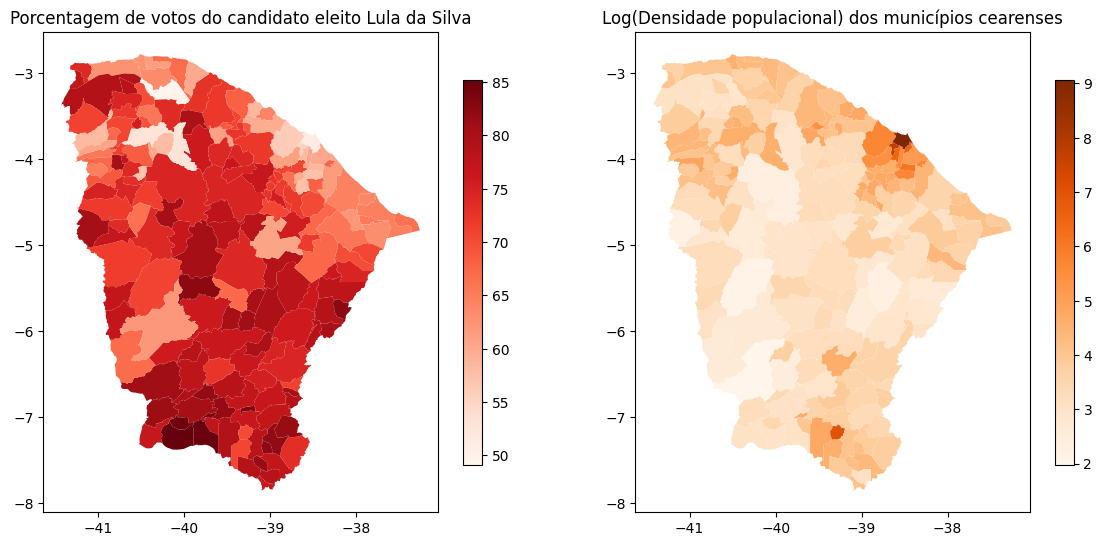

In [84]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))

ax1 = votos_lula_por_municipio.plot('porcentagem_votos', legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Porcentagem de votos do candidato eleito Lula da Silva')
ax2 = dados_ibge.plot(np.log(dados_ibge['densidade_populacional']), cmap= 'Oranges', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Log(Densidade populacional) dos municípios cearenses')
plt.show()

### 4.6.2 Indíce de desenvolvimento humano municipal (IDHM)

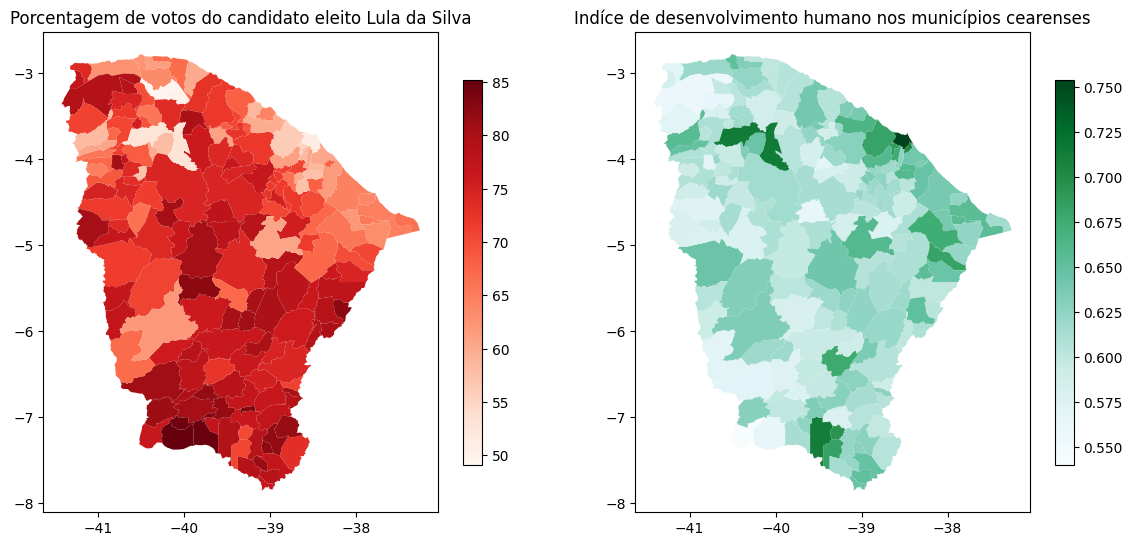

In [85]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))

ax1 = votos_lula_por_municipio.plot('porcentagem_votos', legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Porcentagem de votos do candidato eleito Lula da Silva')
ax2 = dados_ibge.plot('idhm', cmap= 'BuGn', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Indíce de desenvolvimento humano nos municípios cearenses')
plt.show()

### 4.6.3 PIB *per capita*

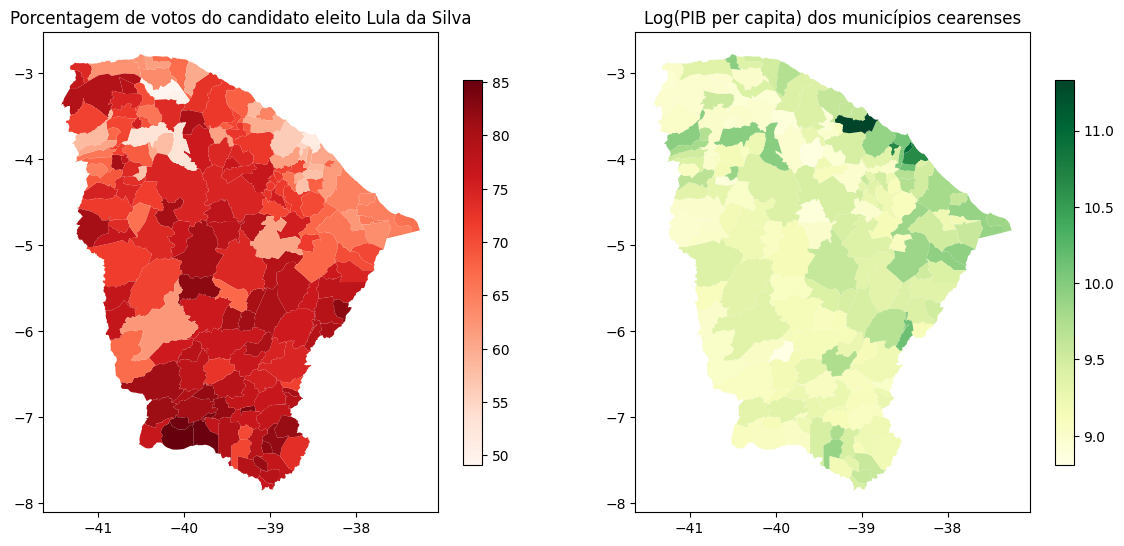

In [86]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))

ax1 = votos_lula_por_municipio.plot('porcentagem_votos', legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Porcentagem de votos do candidato eleito Lula da Silva')
ax2 = dados_ibge.plot(np.log(dados_ibge['pib_per_capita']), cmap= 'YlGn', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Log(PIB per capita) dos municípios cearenses')
plt.show()

### 4.6.4 Área urbanizada

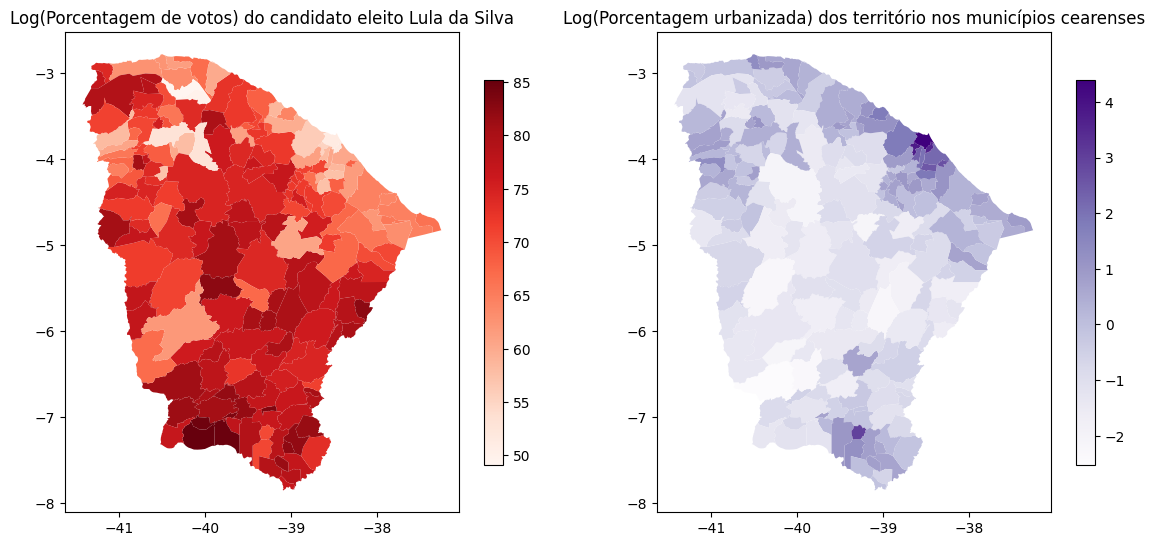

In [87]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))

ax1 = votos_lula_por_municipio.plot('porcentagem_votos', legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Log(Porcentagem de votos) do candidato eleito Lula da Silva')
ax2 = dados_ibge.plot(np.log(dados_ibge['porcentagem_urbana']), cmap= 'Purples', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Log(Porcentagem urbanizada) dos território nos municípios cearenses')
plt.show()

## 4.7 Análise por intervalo de indicadores socioeconômicos

Há a possibilidade de analisar os votos por grupos, intervalos dos indicadores socioeconômicos do IBGE. Instancia-se um *dataframe* com a quantidade de votos para cada candidato em cada município cearense.

In [56]:
# Os dados são agrupados por nome do município e candidato e os votos somados. Por último, os indíces são resetados:

votos_candidatos_por_municipio = presidente.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()
votos_candidatos_por_municipio.head()

,nm_municipio,nm_votavel,qt_votos
0,ABAIARA,CIRO FERREIRA GOMES,183
1,ABAIARA,JAIR MESSIAS BOLSONARO,594
2,ABAIARA,KELMON LUIS DA SILVA SOUZA,4
3,ABAIARA,LEONARDO PÉRICLES VIEIRA ROQUE,1
4,ABAIARA,LUIZ FELIPE CHAVES D AVILA,1


In [57]:
# Os dados socioeconômicos do IBGE são juntados ao dataframe dos votos:

votos_candidatos_por_municipio = pd.merge(
    left= votos_candidatos_por_municipio, right= dados_ibge,
    how= 'left', left_on= 'nm_municipio', right_on= 'name_muni'
)

# A coluna nome é retirada, pois os dados são redundantes:

votos_candidatos_por_municipio = votos_candidatos_por_municipio.drop('name_muni', axis= 1)
votos_candidatos_por_municipio.head()

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional
0,ABAIARA,CIRO FERREIRA GOMES,183,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
1,ABAIARA,JAIR MESSIAS BOLSONARO,594,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
2,ABAIARA,KELMON LUIS DA SILVA SOUZA,4,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
3,ABAIARA,LEONARDO PÉRICLES VIEIRA ROQUE,1,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
4,ABAIARA,LUIZ FELIPE CHAVES D AVILA,1,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17


As funções abaixo serão utilizadas para ajustar os dados para análise:

In [88]:
def intervalos_ibge(dataframe: pd.DataFrame, nome_coluna: str, nova_coluna: str, bins: list, labels: list):
  '''
  A função 'intervalos_ibge' adiciona ao dataframe com os votos dos candidatos por município uma nova coluna. Tal coluna passa a conter um intervalo
  pré-determinado determinado indicador do IBGE relacionado ao município em questão.

  dataframe: dataframe contendo os votos por candidato em cada município.
  nome_coluna: coluna com a informação que será utilizada para gerar o intervalo.
  nova_coluna: nome da nova coluna contendo os intervalos dos indicadores do IBGE.
  bins: lista com os valores que serão usados para formar os intervalos dos indicadores.
  labels: lista com as labels dos intervalos.
  '''

  dataframe[nova_coluna] = pd.cut(
      dataframe[nome_coluna], bins= bins, labels= labels,
      include_lowest= True, right= False # o valor mais baixo é incluso, enquanto o valor maior não é incluso.
  )

  return dataframe # retorna o dataframe, agora contendo a coluna com os intervalos dos indicadores do IBGE.

def dict_votos_totais(dataframe: pd.DataFrame, coluna_indicador: str):
  '''
  A função dict_votos_totais retorna um dicionário com a quantidade de votos gerais para cada intervalo dos indicadores do IBGE.

  dataframe: contendo os votos por candidato em cada município, além da coluna com os intervalos dos indicadores.
  coluna_indicador: nome da coluna contendo os intervalos dos indicadores.
  '''

  valores_totais = dataframe.groupby(coluna_indicador)['qt_votos'].sum()
  valores_totais = dict(valores_totais)

  return valores_totais

def dataframe_com_porcentagens(dataframe: pd.DataFrame, dictionary: dict, coluna_indicador: str):
  '''
  A função dataframe_com_porcentagens retorna um dataframe contendo a porcentagem de votos para cada candidato referente a cada intervalo de indicador.

  dataframe: dataframe com votos dos candidatos por municípios.
  dictionary: dicionário contendo os votos totais de cada intervalo de indicador do IBGE.
  coluna_indicador: coluna com o indicador do IBGE que se deseja calcular os valores de porcentagem.
  '''

  # O dataframe é agrupado pela coluna com os indicadores e nome dos candidatos, os votos são somados e ordenados:

  dataframe_intervalos_ibge = dataframe.groupby([coluna_indicador, 'nm_votavel'])['qt_votos'].sum()\
                                       .reset_index().sort_values([coluna_indicador, 'qt_votos'], ascending= [True, False])

  # A porcentagem para cada candidado em cada intervalo do indicador é calculada:

  porcentagem = list()

  for index, row in dataframe_intervalos_ibge.iterrows():
    valor = round((row['qt_votos']/dictionary[row[coluna_indicador]]) * 100, 2)
    porcentagem.append(valor)

  # E depois uma nova coluna é adicionada ao dataframe que é retornado:

  dataframe_intervalos_ibge['porcentagem_' + coluna_indicador] = porcentagem # o nome da coluna é obtido a partir da concatenação das strings.

  return dataframe_intervalos_ibge

### 4.7.1 Intervalos populacionais

In [59]:
# Intervalos:

bins = [0, 100000, 500000, 3000000]

# Labels para os intervalos populacionais:

labels = ['Menos de 100 mil habitantes', '100 mil e menos de 500 mil habitantes', '500 mil habitantes ou mais']

In [60]:
# Uma nova coluna com os intervalos populacionais é adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe= votos_candidatos_por_municipio,
    nome_coluna= 'populacao',
    nova_coluna= 'populacao_intervalos',
    bins= bins, labels= labels
)
votos_candidatos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos
0,ABAIARA,CIRO FERREIRA GOMES,183,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes
1,ABAIARA,JAIR MESSIAS BOLSONARO,594,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes


In [61]:
# Os votos totais para cada intervalo populacional são mostrados no dicionário:

votos_por_intervalo_populacional = dict_votos_totais(votos_candidatos_por_municipio, 'populacao_intervalos')
votos_por_intervalo_populacional

{'Menos de 100 mil habitantes': 3146267,
 '100 mil e menos de 500 mil habitantes': 918998,
 '500 mil habitantes ou mais': 1563345}

In [62]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_populacionais = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_populacional, 'populacao_intervalos'
)
votos_intervalos_populacionais.head()

,populacao_intervalos,nm_votavel,qt_votos,porcentagem_populacao_intervalos
6,Menos de 100 mil habitantes,LUIZ INÁCIO LULA DA SILVA,2197649,69.85
1,Menos de 100 mil habitantes,JAIR MESSIAS BOLSONARO,623212,19.81
0,Menos de 100 mil habitantes,CIRO FERREIRA GOMES,172469,5.48
12,Menos de 100 mil habitantes,VOTO NULO,70865,2.25
11,Menos de 100 mil habitantes,VOTO BRANCO,39662,1.26


In [63]:
fig = px.bar(
    data_frame= votos_intervalos_populacionais,
    y= 'populacao_intervalos',
    x= 'porcentagem_populacao_intervalos',
    color= 'nm_votavel',
    title= 'Porcentagem de votos dos candidatos por intervalo populacional dos municípios cearenses'
)
fig.update_layout(
    yaxis_title= '', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos',
    yaxis= dict(autorange= 'reversed'), title= dict(x= 0.5)
)
fig.show()

> * O percentual de votos dos candidatos **Jair Bolsonaro e Ciro Gomes cresce nos grupos com maior população.** Com **Jair Bolsonaro** atingindo quase **34% no grupo dos municípios com mais de 500 mil habitantes.**
> * Já com o candidato eleito **Luiz Inácio Lula da Silva** o comportamento visualizado é o contrário, apesar de ter a maioria dos votos em todos os grupos populacionais, **nos municípios com mais de 500 mil habitantes sua porcentagem de foi menor que nos outros grupos, apesar de ter mais da metade dos votos.**

### 4.7.2 Intervalos de indíce de desenvolvimento humano (IDHM)

In [64]:
# Intervalos:

bins = [0, 0.55, 0.7, 0.8]

# Labels para os intervalos de IDH municipal:

labels = ['IDH baixo', 'IDH médio', 'IDH alto']

In [65]:
# Uma nova coluna com os intervalos de IDHM é adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe= votos_candidatos_por_municipio,
    nome_coluna= 'idhm',
    nova_coluna= 'idhm_intervalos',
    bins= bins, labels= labels
)
votos_candidatos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos,idhm_intervalos
0,ABAIARA,CIRO FERREIRA GOMES,183,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio
1,ABAIARA,JAIR MESSIAS BOLSONARO,594,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio


In [66]:
# Os votos totais para cada intervalo de IDHM são mostrados no dicionário:

votos_por_intervalo_idhm = dict_votos_totais(votos_candidatos_por_municipio, 'idhm_intervalos')
votos_por_intervalo_idhm

{'IDH baixo': 11019, 'IDH médio': 3805920, 'IDH alto': 1811671}

In [67]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_idhm = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_idhm, 'idhm_intervalos'
)
votos_intervalos_idhm.head()

,idhm_intervalos,nm_votavel,qt_votos,porcentagem_idhm_intervalos
6,IDH baixo,LUIZ INÁCIO LULA DA SILVA,8462,76.79
1,IDH baixo,JAIR MESSIAS BOLSONARO,1388,12.60
0,IDH baixo,CIRO FERREIRA GOMES,802,7.28
12,IDH baixo,VOTO NULO,207,1.88
11,IDH baixo,VOTO BRANCO,93,0.84


In [68]:
fig = px.bar(
    data_frame= votos_intervalos_idhm,
    y= 'idhm_intervalos',
    x= 'porcentagem_idhm_intervalos',
    color= 'nm_votavel',
    title= 'Porcentagem de votos dos candidatos por intervalo de IDH municipal dos municípios cearenses'
)
fig.update_layout(
    yaxis_title= '', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos',
    yaxis= dict(autorange= 'reversed'), title= dict(x= 0.5)
)
fig.show()

> * O intervalo IDH baixo é referente unicamente ao município de Salitre, o que pode ser visto abaixo:

In [69]:
votos_candidatos_por_municipio.query('idhm_intervalos == "IDH baixo"')['nm_municipio'].unique()

array(['SALITRE'], dtype=object)

> * E nesse município, em específico, o candidato** Jair Bolsonaro teve um desempenho eleitoral baixo, acompanhado de grande percentual de votos do candidato eleito Lula da Silva.**
> * Tanto **Jair Bolsonaro**, quanto **Ciro Gomes** tiverem **melhor desempenho no grupo com os municípios de IDH alto.** O **menor desempenho** de **Lula da Silva também ocorreu nesse grupo**, mas ainda com a maioria dos votos (52,64%).

### 4.7.3 Intervalos de PIB *per capita*

In [70]:
# Intervalos:

bins = [0, 10000, 20000, 90000]

# Labels para os intervalos de PIB per capita:

labels = ['Menos de R$ 10000', 'Entre R$ 10000 - 19999,99', 'R$ 20000 ou mais']

In [71]:
# Uma nova coluna com os intervalos de PIB per capita é adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe= votos_candidatos_por_municipio,
    nome_coluna= 'pib_per_capita',
    nova_coluna= 'pib_intervalos',
    bins= bins, labels= labels
)
votos_candidatos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos,idhm_intervalos,pib_intervalos
0,ABAIARA,CIRO FERREIRA GOMES,183,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000
1,ABAIARA,JAIR MESSIAS BOLSONARO,594,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000


In [72]:
# Os votos totais para cada intervalo de PIB per capita são mostrados no dicionário:

votos_por_intervalo_pib = dict_votos_totais(votos_candidatos_por_municipio, 'pib_intervalos')
votos_por_intervalo_pib

{'Menos de R$ 10000': 1131915,
 'Entre R$ 10000 - 19999,99': 2323021,
 'R$ 20000 ou mais': 2173674}

In [73]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_pib = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_pib, 'pib_intervalos'
)
votos_intervalos_pib.head()

,pib_intervalos,nm_votavel,qt_votos,porcentagem_pib_intervalos
6,Menos de R$ 10000,LUIZ INÁCIO LULA DA SILVA,838927,74.12
1,Menos de R$ 10000,JAIR MESSIAS BOLSONARO,180904,15.98
0,Menos de R$ 10000,CIRO FERREIRA GOMES,59565,5.26
12,Menos de R$ 10000,VOTO NULO,25418,2.25
11,Menos de R$ 10000,VOTO BRANCO,13097,1.16


In [74]:
fig = px.bar(
    data_frame= votos_intervalos_pib,
    y= 'pib_intervalos',
    x= 'porcentagem_pib_intervalos',
    color= 'nm_votavel',
    title= 'Porcentagem de votos dos candidatos por intervalo de PIB per capita dos municípios cearenses'
)
fig.update_layout(
    yaxis_title= '', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos',
    yaxis= dict(autorange= 'reversed'), title= dict(x= 0.5)
)
fig.show()

> * O percentual de votos dos candidatos **Jair Bolsonaro e Ciro Gomes cresce nos grupos de municípios com maior PIB *per capita*.**
* **A tendência inversa acontece com Lula da Silva**, apesar de ter em todos os grupos mais da metade dos votos.

### 4.7.4 Intervalos de território urbanizado

In [75]:
# Intervalos:

bins= [0, 10, 40, 90]

# Labels para os intervalos de território urbanizado:

labels= ['Menos de 10%', 'Entre 10 - 39,99%', '40% ou mais']

In [76]:
# Uma nova coluna com os intervalos de território urbanizado é adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe= votos_candidatos_por_municipio,
    nome_coluna= 'porcentagem_urbana',
    nova_coluna= 'urbana_intervalos',
    bins= bins, labels= labels
)
votos_candidatos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos,idhm_intervalos,pib_intervalos,urbana_intervalos
0,ABAIARA,CIRO FERREIRA GOMES,183,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000,Menos de 10%
1,ABAIARA,JAIR MESSIAS BOLSONARO,594,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000,Menos de 10%


In [77]:
# Os votos totais para cada intervalo de território urbanizado são mostrados no dicionário:

votos_por_intervalo_urbana = dict_votos_totais(votos_candidatos_por_municipio, 'urbana_intervalos')
votos_por_intervalo_urbana

{'Menos de 10%': 3609410, 'Entre 10 - 39,99%': 307098, '40% ou mais': 1712102}

In [78]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_urbana = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_urbana, 'urbana_intervalos'
)
votos_intervalos_urbana.head()

,urbana_intervalos,nm_votavel,qt_votos,porcentagem_urbana_intervalos
6,Menos de 10%,LUIZ INÁCIO LULA DA SILVA,2497819,69.20
1,Menos de 10%,JAIR MESSIAS BOLSONARO,721929,20.00
0,Menos de 10%,CIRO FERREIRA GOMES,212681,5.89
12,Menos de 10%,VOTO NULO,81328,2.25
11,Menos de 10%,VOTO BRANCO,45982,1.27


In [79]:
fig = px.bar(
    data_frame= votos_intervalos_urbana,
    y= 'urbana_intervalos',
    x= 'porcentagem_urbana_intervalos',
    color= 'nm_votavel',
    title= 'Porcentagem de votos dos candidatos por intervalo de território urbanizado dos municípios cearenses'
)
fig.update_layout(
    yaxis_title= '', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos',
    yaxis= dict(autorange= 'reversed'), title= dict(x= 0.5)
)
fig.show()

> * O percentual de votos de **Ciro Gomes** **pouco se altera entre os dois primeiros grupos** e é **mais significativo** nos municípios **mais urbanizados.**
* O percentual de votos de **Jair Bolsonaro** **cresce** nos grupos de cidades **mais urbanizadas.**
* E a tendência é **inversa** para **Lula da Silv**a, mesmo assim ele mantém **mais de metade dos votos** no grupo mais urbanizado.